In [29]:
# read data
import csv

def load_data():
    data = []

    label = ['image_id','unixtime','rawtime','title','total_votes','reddit_id','number_of_upvotes',\
    'subreddit','number_of_downvotes','localtime','score','number_of_comments','username',\
    'undefined1','undefined2', 'undefined3']

    with open('data/redditSubmissions.csv') as csvfile:
        csvReader = csv.reader(csvfile)
        for row in csvReader:
            if row[0] == '#image_id' or len(row) < 13:
                continue

            d = {}
            for i,elem in enumerate(row):
                d[label[i]] = elem
            data.append(d)


    return data


data = load_data()


Since there are 132307 valid data entries, there are 132307 submissions.

In [30]:
from collections import Counter
users = Counter()
images = Counter()
subreddits = Counter()
submission_ids = Counter()

for d in data:
    images[d['image_id']] += 1
    users[d['username']] += 1
    subreddits[d['subreddit']] += 1
    submission_ids[d['reddit_id']] +=1

print len(images)
print len(users)

16736
63338


There are 16736 distinct images, and 63338 distinct users(identified by "username").

In [31]:
# Score of sucess versus time
# Notice that the T in rawtime does not mean Tuesday, but means Time

import re
catchTime = re.compile("(.*)T(\d{2}):(\d{2}).*((-|\+)\d{2})")


for d in data:
    t = d['rawtime']
    m = catchTime.search(t)
    if m:
        d['hour'] = int(m.group(2))
        d['minute'] = int(m.group(3))
        if d['minute'] >= 30:
            d['time'] = (d['hour'] +1*0)%24
        else:
            d['time'] = d['hour']
                
        
        d['timezone'] = int(m.group(4))
        #d['date'] = m.group(1) # might be 1 hour off
        d['UTCtime'] = (d['time'] + d['timezone'])%24
    else:
        #Acutally this never happens
        d['time'] = 0
#     score = int(d['number_of_upvotes'])-int(d['number_of_downvotes'])
#     d['success'] = score

What times of day are submissions most commented on or most rated? Notice that the similar chart in PPT in class is wrong, since it calculates the UTC time in the wrong directions...

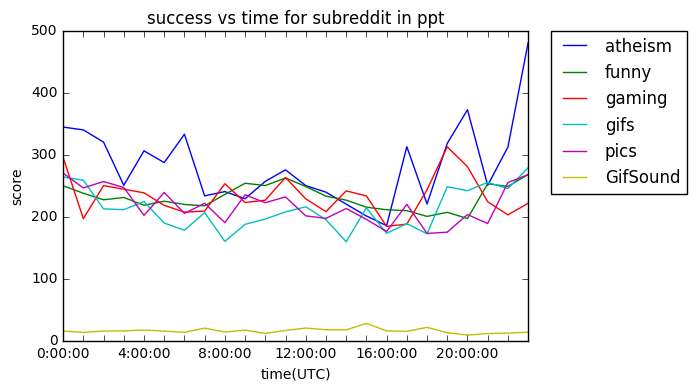

In [32]:
from pylab import *
import matplotlib.pyplot as plt
import datetime

egsub = ['atheism','funny','gaming','gifs','pics','GifSound']
subs = {}
subsCount = {}
for sub in egsub:
    subs[sub] = 0
    subsCount[sub] = 0
# subs

for index_s in range(len(subs)):
    s = egsub[index_s]
    #print "plotting", s, "..."
    l = [0.0]*24
    c = [0.0]*24
    xt = [str(datetime.timedelta(hours = i)) for i in range(24)]
    x = [i for i in range(24)]
    sxt = [xt[i] if i%4 ==0 else '' for i in range(24)]
    
    #print x
    for d in data:
        if d['subreddit'] == s:
            l[d['UTCtime']] += int(d['score'])
            c[d['UTCtime']] += 1
    
    for i in range(len(l)):
        l[i] /= c[i]
        #print l[i]
#     print s,l
    plt.plot(x,l,label = s)
    plt.xticks(arange(24), sxt)
    #plt.gcf().autofmt_xdate()
    xlabel('time(UTC)')
    ylabel('score')
    title('success vs time for subreddit in ppt')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

            

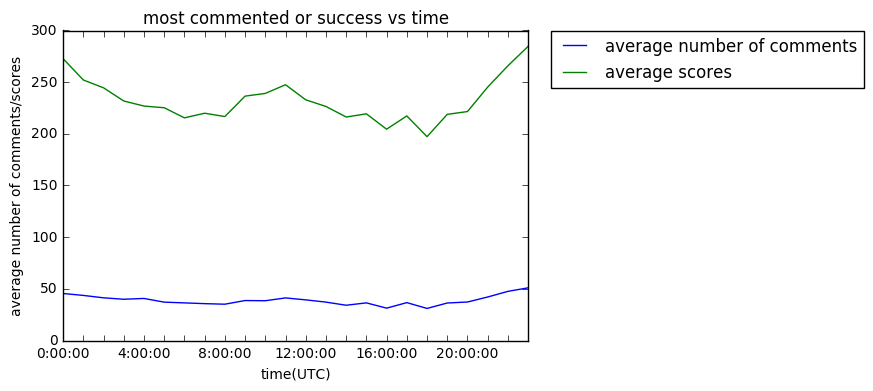

In [33]:
# What times of day are submissions most commented or rated?
cmts = [0.0]*24
cnts = [0.0]*24
sucs = [0.0]*24

for d in data:
    cmts[d['UTCtime']] += int(d['number_of_comments'])
    cnts[d['UTCtime']] += 1
    sucs[d['UTCtime']] += int(d['score'])
    
for i in range(len(cmts)):
        cmts[i] /= cnts[i]
        sucs[i] /= cnts[i]
    
    
xt = [str(datetime.timedelta(hours = i)) for i in range(24)]
x = [i for i in range(24)]
sxt = [xt[i] if i%4 ==0 else '' for i in range(24)]


plt.plot(x,cmts,label = "average number of comments")
plt.xticks(arange(24), sxt)
#plt.gcf().autofmt_xdate()
xlabel('time(UTC)')
ylabel('average number of comments/scores')
title('most commented or success vs time')


plt.plot(x,sucs,label = "average scores")
xlabel('time(UTC)')
ylabel('average number of comments/scores')
title('most commented or success vs time')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

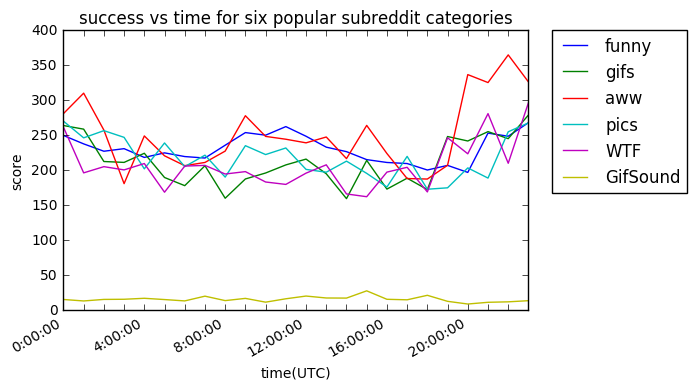

In [34]:
from pylab import *
import matplotlib.pyplot as plt
import datetime

subs = {}
subsCount = {}
for sub in subreddits.most_common(6):
    subs[sub[0]] = 0
    subsCount[sub[0]] = 0
# subs

for s in subs:
    #print "plotting", s, "..."
    l = [0.0]*24
    c = [0.0]*24
    xt = [str(datetime.timedelta(hours = i)) for i in range(24)]
    x = [i for i in range(24)]
    sxt = [xt[i] if i%4 ==0 else '' for i in range(24)]
    
    #print x
    for d in data:
        if d['subreddit'] == s:
            l[d['UTCtime']] += int(d['score'])
            c[d['UTCtime']] += 1
    for i in range(len(l)):
        l[i] /= c[i]
        #print l[i]
    
    plt.plot(x,l,label = s)
    plt.xticks(arange(24), sxt)
    plt.gcf().autofmt_xdate()
    xlabel('time(UTC)')
    ylabel('score')
    title('success vs time for six popular subreddit categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('success vs time for six popular subreddit categories.png',dpi=600,bbox_inches='tight')
plt.show()


In [35]:
# A peek of data
data[0]

{'UTCtime': 5,
 'hour': 12,
 'image_id': '0',
 'localtime': '1333197639',
 'minute': 40,
 'number_of_comments': '622',
 'number_of_downvotes': '30813',
 'number_of_upvotes': '32657',
 'rawtime': '2012-03-31T12:40:39.590113-07:00',
 'reddit_id': 'rmqjs',
 'score': '1844',
 'subreddit': 'funny',
 'time': 12,
 'timezone': -7,
 'title': "And here's a downvote.",
 'total_votes': '63470',
 'unixtime': '1333172439',
 'username': 'Animates_Everything'}